#### Merge Output Files

In [11]:
# This is a util function for one time run. Do not rerun while executing.

fout=open("mud-outputs/new/merged-1.csv","a")

for line in open("mud-outputs/new/output-1.csv"):
    fout.write(line)

for num in range(0,100):
    f = open("mud-outputs/new/output-"+str(num)+".csv")
    next(f)
    for line in f:
         fout.write(line)
    f.close()

fout.close()

## Visualizations

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("./model/datasets/feature-updated-dataset.csv", low_memory=False)

def map_f(label):
    if label == 1:
        return "Malicious"
    else:
        return "Non-Malicious"

df['label'] = df['label'].apply(lambda x: map_f(x))


In [2]:
display(df)

,url,label,page_entropy,number_of_script_tags,script_to_body_ratio,length_of_html,number_of_tokens,number_of_sentences,number_of_punctuations,number_of_capitalizations,...,number_of_fragments,is_encoded,num_encoded_char,number_of_subdirectories,number_of_periods,has_client_in_string,has_admin_in_string,has_server_in_string,has_login_in_string,get_tld
0,http://edilsimsrl.net/excel/order/adobeCom/667...,Malicious,4.625598,0,0.000000,315,41,4,8,43,...,0,0,0,5,1,0,0,0,0,net
1,http://leverdistribuidora.com.br/images/custom...,Malicious,4.625598,0,0.000000,315,41,4,8,43,...,0,0,0,5,3,0,0,0,0,br
2,http://rsthomas.net/T/image.htm,Malicious,3.974875,0,0.000000,48,3,2,1,2,...,0,0,0,3,2,0,0,0,0,net
3,http://162.144.84.82/~tdsecureupdate/Tdbank.co...,Malicious,4.848084,0,0.000000,10133,427,60,640,1766,...,0,0,0,4,5,0,0,0,0,82
4,http://162.144.84.82/~tdsecureupdate/Tdbank.co...,Malicious,4.847764,0,0.000000,10133,427,60,640,1766,...,0,0,0,4,5,0,0,0,1,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59335,http://chemistry.missouri.edu/,Non-Malicious,4.749841,9,0.016681,20023,1006,112,2209,283,...,0,0,0,2,2,0,0,0,0,edu
59336,http://chemistry.technion.ac.il/seymour_schuli...,Non-Malicious,5.046173,0,0.000000,568,49,11,42,33,...,0,0,0,2,4,0,0,0,0,il
59337,http://chemistrydaily.com/chemistry/University...,Non-Malicious,4.362936,0,0.000000,150,9,1,0,2,...,0,0,0,3,1,0,0,0,0,com
59338,http://chemistrydaily.com/chemistry/chemistryd...,Non-Malicious,4.362936,0,0.000000,150,9,1,0,2,...,0,0,0,3,2,0,0,0,0,com


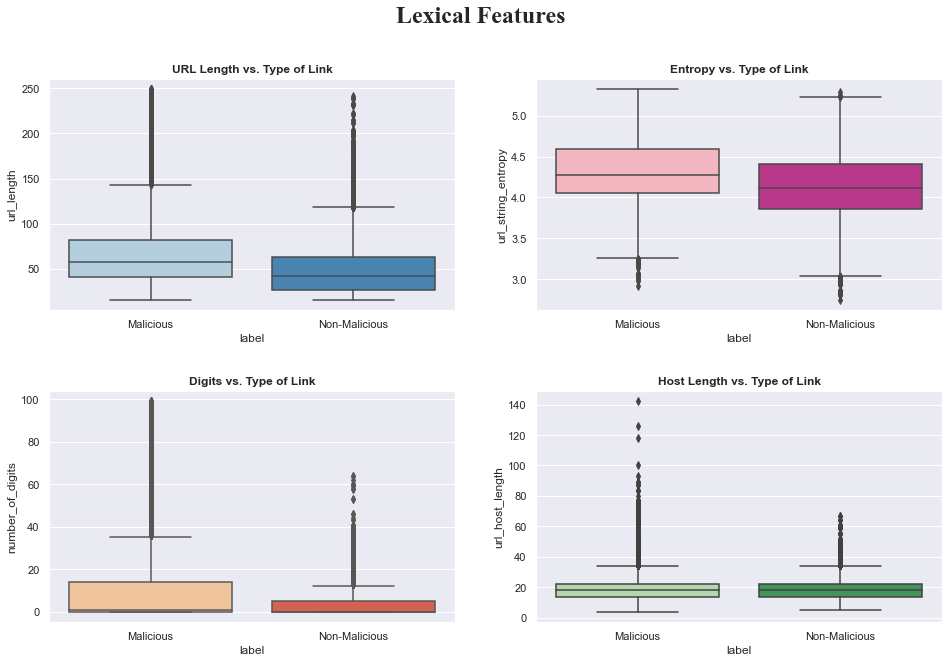

In [3]:
# removing outliers
q_low = df["url_length"].quantile(0.01)
q_hi = df["url_length"].quantile(0.99)
df_filtered = df[(df["url_length"] < q_hi) & (df["url_length"] > q_low)]

df = df[df['number_of_digits'] < 500]
df = df[df['number_of_digits'] < 100]

label = df["label"]
url_length = df_filtered["url_length"]
url_string_entropy = df["url_string_entropy"]
number_of_digits = df["number_of_digits"]
url_host_length = df["url_host_length"]

#set seaborn plotting aesthetics as default
sns.set(style="darkgrid")
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16,10))

#create boxplot in each subplot
sns.boxplot(data=df_filtered, x=label, y=url_length, ax=axes[0,0], palette="Blues") \
    .set_title('URL Length vs. Type of Link', fontweight="bold", fontname="Arial", size=12)

sns.boxplot(data=df, x=label, y=url_string_entropy, ax=axes[0,1], palette="RdPu") \
    .set_title('Entropy vs. Type of Link', fontweight="bold", fontname="Arial", size=12)

sns.boxplot(data=df, x=label, y=number_of_digits, ax=axes[1,0], palette="OrRd") \
    .set_title('Digits vs. Type of Link', fontweight="bold", fontname="Arial", size=12)

sns.boxplot(data=df, x=label, y=url_host_length, ax=axes[1,1], palette="Greens") \
    .set_title('Host Length vs. Type of Link', fontweight="bold", fontname="Arial", size=12)

plt.suptitle('Lexical Features', fontweight="bold", size=24, fontname="Times New Roman")
plt.subplots_adjust(hspace = 0.35)

plt.show()
# plt.savefig('lexical-boxplot.png')

                      Malicious  Non-Malicious
is_encoded             0.033843       0.012922
has_client_in_string   0.008856       0.000169
has_admin_in_string    0.059958       0.000386
has_server_in_string   0.005640       0.000676


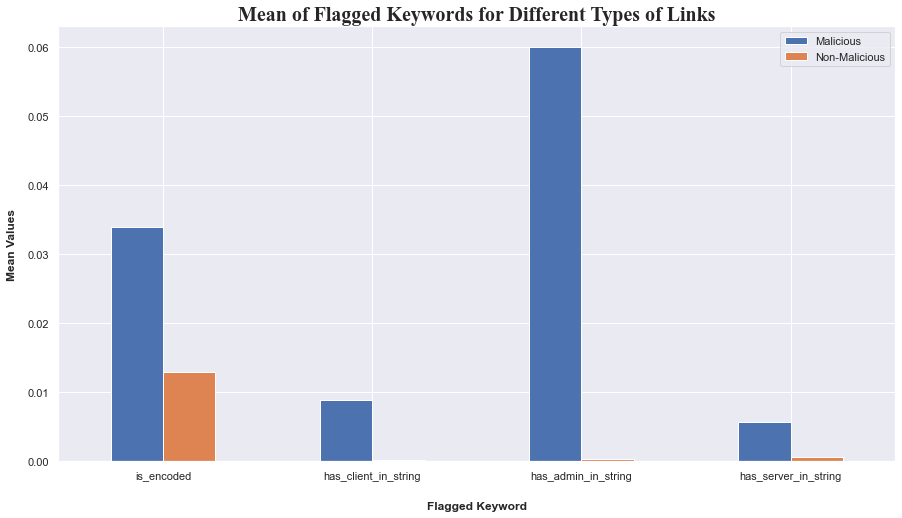

In [4]:
data_mal = df.loc[df["label"] == "Malicious"] # mal
data_non = df.loc[df["label"] == "Non-Malicious"] # non-mal

plotdata = pd.DataFrame({

    "Malicious":[data_mal["is_encoded"].mean(), data_mal["has_client_in_string"].mean(), 
           data_mal["has_admin_in_string"].mean(),data_mal["has_server_in_string"].mean()],
    #"has_login_in_string"
    "Non-Malicious":[data_non["is_encoded"].mean(), data_non["has_client_in_string"].mean(), 
               data_non["has_admin_in_string"].mean(), data_non["has_server_in_string"].mean()]},

    index=["is_encoded", "has_client_in_string", "has_admin_in_string", "has_server_in_string"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Mean of Flagged Keywords for Different Types of Links", 
          fontweight="bold", size=20, fontname="Times New Roman")

plt.xlabel("Flagged Keyword", fontweight="bold", size=12, fontname="Arial", labelpad=20)
plt.xticks(rotation=0)
plt.ylabel("Mean Values", fontweight="bold", size=12, fontname="Arial", labelpad=10)

print(plotdata)


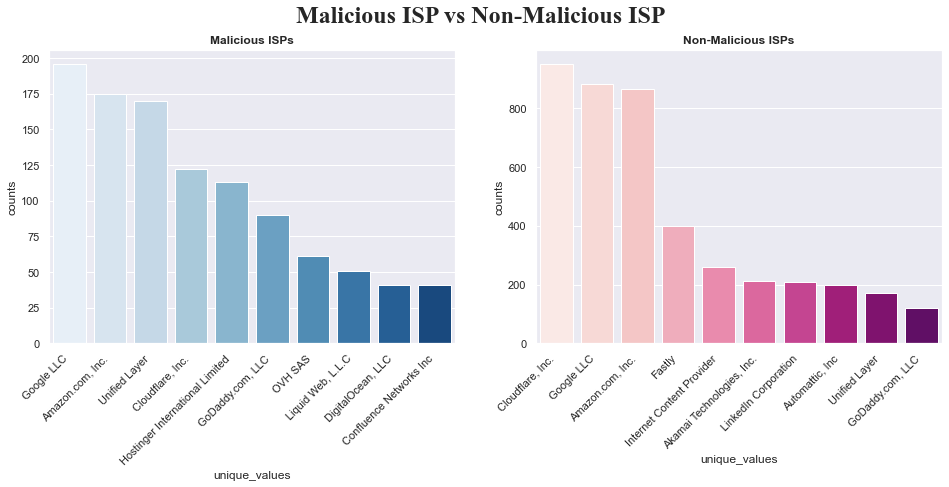

In [5]:
sort_mal = data_mal['isp'].value_counts().rename_axis('unique_values').reset_index(name='counts')[0:10]
sort_non = data_non['isp'].value_counts().rename_axis('unique_values').reset_index(name='counts')[0:10]

#set seaborn plotting aesthetics as default
sns.set(style="darkgrid")
#define plotting region (1 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16,6))

#create barplot in each subplot
bar1 = sns.barplot(data=sort_mal, x="unique_values", y ="counts", ax=axes[0], palette="Blues") \
    .set_title('Malicious ISPs', fontweight ="bold", fontname="Arial", size=12)

bar2 = sns.barplot(data=sort_non, x="unique_values", y ="counts", ax=axes[1], palette="RdPu") \
    .set_title('Non-Malicious ISPs', fontweight ="bold", fontname="Arial", size=12)


plt.suptitle('Malicious ISP vs Non-Malicious ISP', fontweight="bold", size=24, fontname="Times New Roman")
plt.subplots_adjust(hspace = 0.35)
fig.autofmt_xdate(rotation=45)
plt.show()

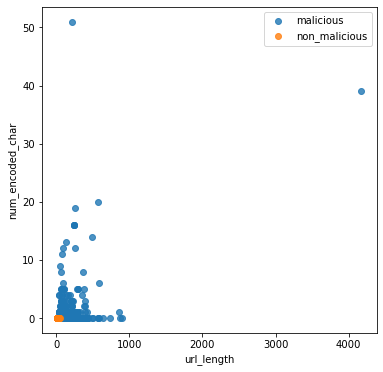

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load Dataset
malicious = df.loc[df['label'] == 1]
non_malicious = df.loc[df['label'] == 0]

#Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 6))

#Add the plots for each dataframe
sns.regplot(x='url_length', y='num_encoded_char', data=malicious, fit_reg=False, ci=None, ax=ax, label='malicious')
sns.regplot(x='url_length', y='num_encoded_char', data=non_malicious, fit_reg=False, ci=None, ax=ax, label='non_malicious')
ax.set(ylabel='num_encoded_char', xlabel='url_length')
ax.legend()
plt.show()